In [7]:
from scapy.all import*
from math import*
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [8]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add
files_add=find_the_way('./pcap/','.pcap')

In [9]:
def pad(ls,size):
    for i in range(0,size-len(ls)):
        ls.append(0)
    return ls



=====================Aria\Setup-A-1-STA.pcap=====================



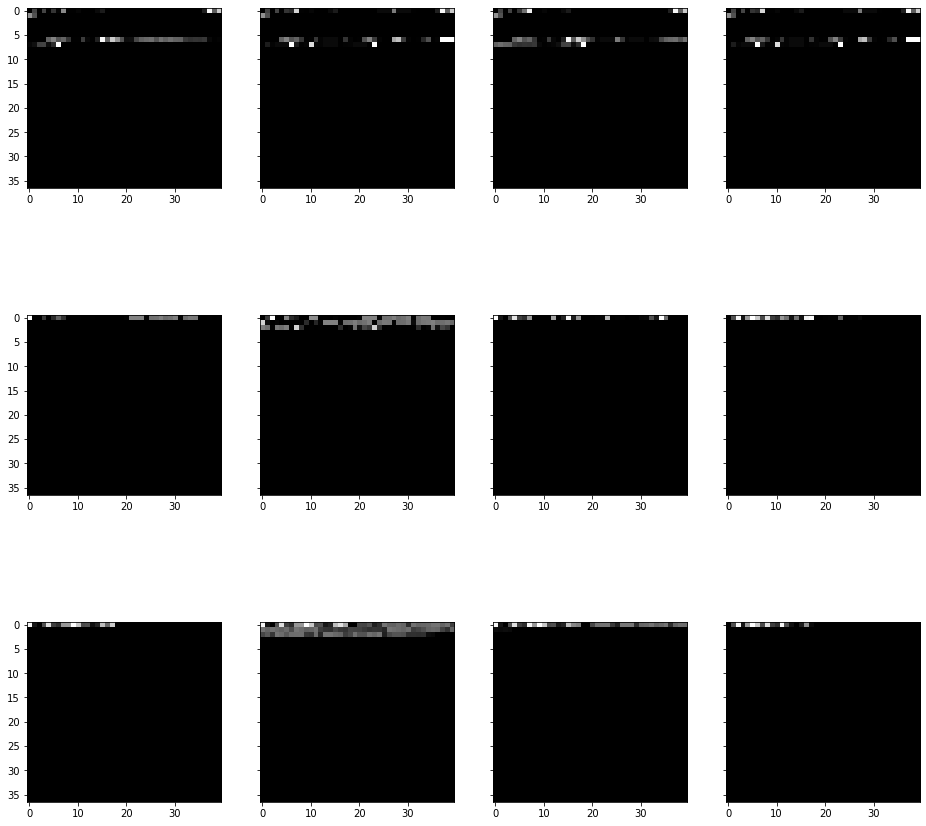



=====================D-LinkCam\Setup-A-1-STA.pcap=====================



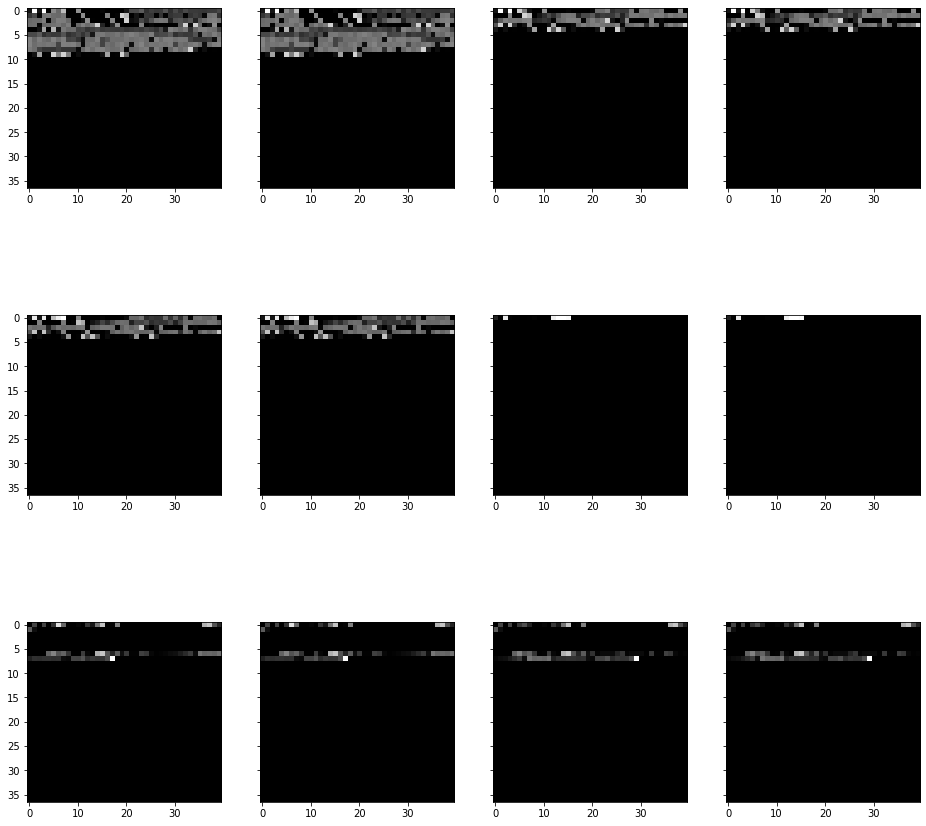



=====================D-LinkDayCam\Setup-A-1-STA.pcap=====================



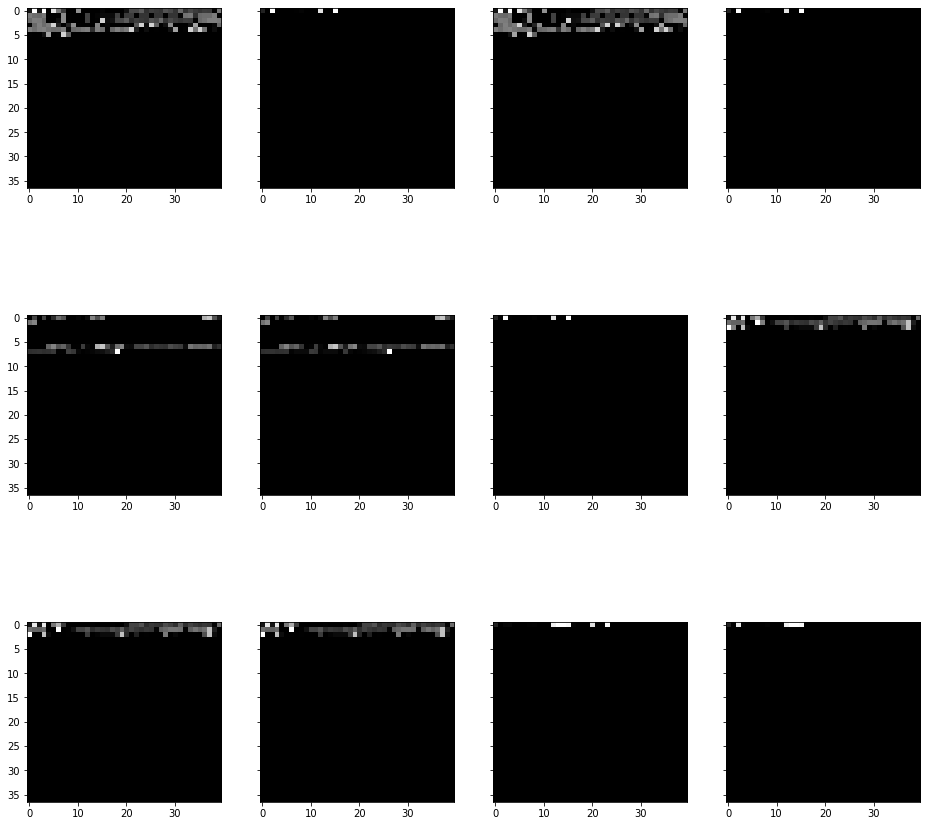



=====================D-LinkDoorSensor\Setup-C-1-STA.pcap=====================



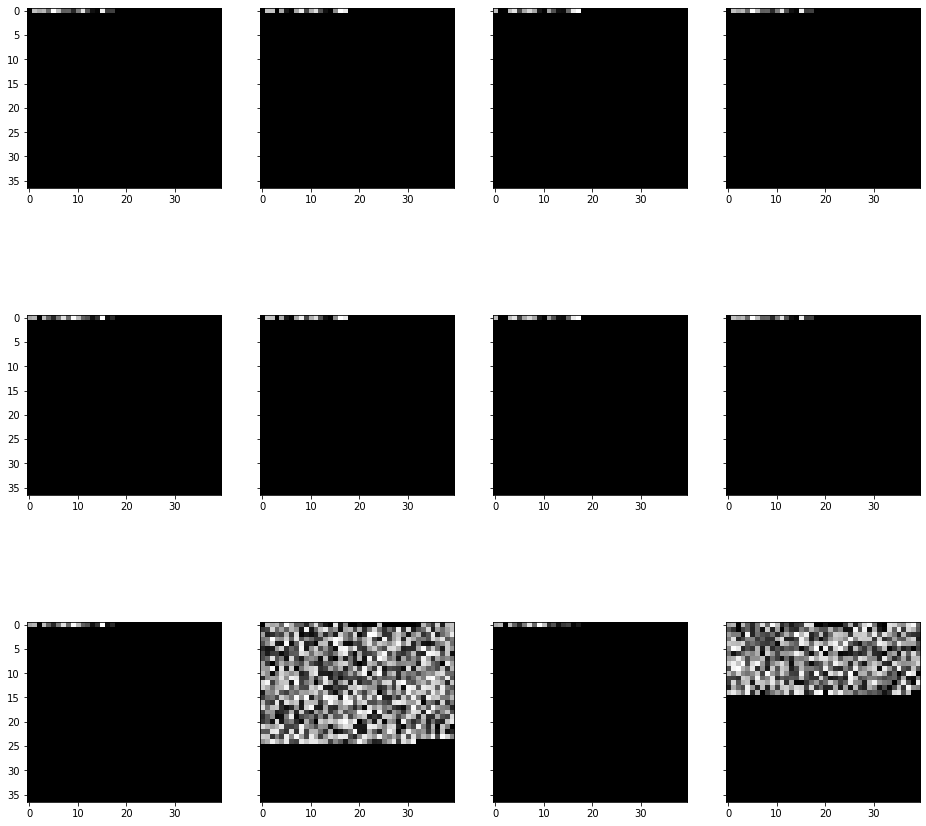



=====================D-LinkHomeHub\Setup-A-1-STA.pcap=====================



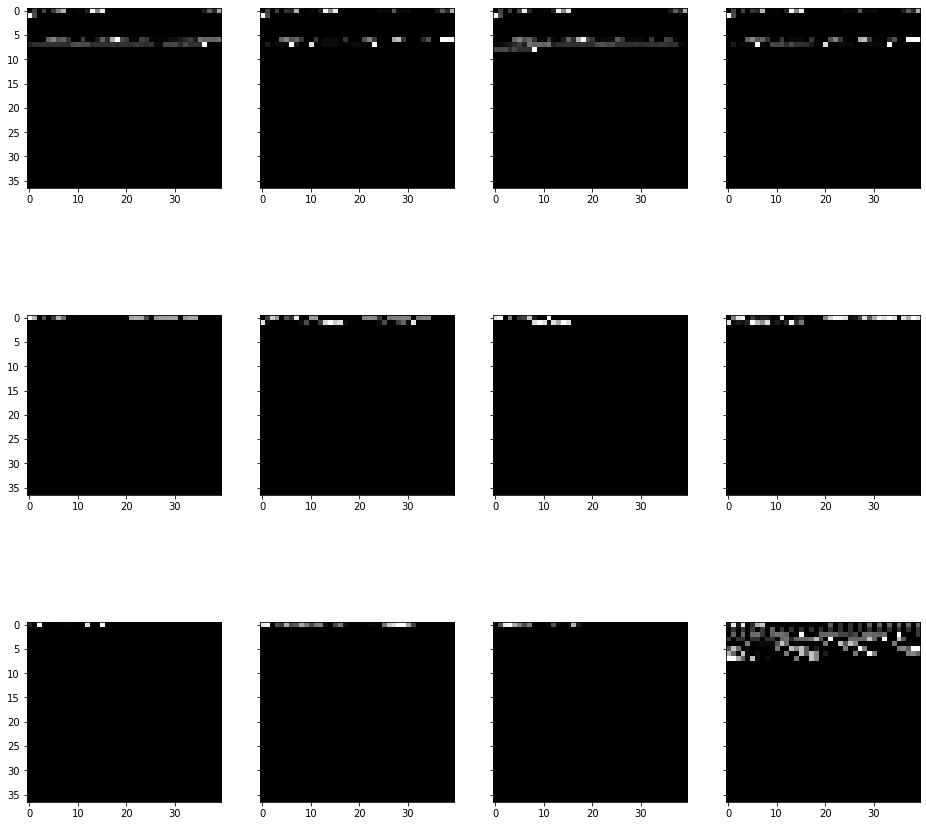



=====================D-LinkSensor\Setup-A-1-STA.pcap=====================



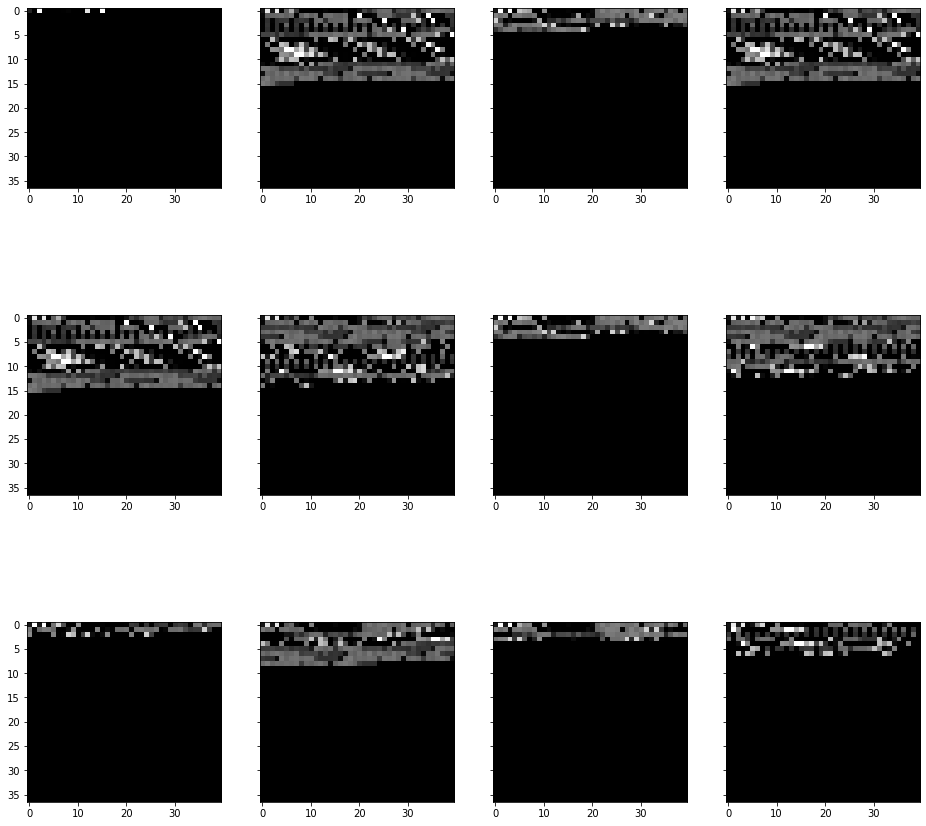



=====================D-LinkSiren\Setup-A-1-STA.pcap=====================



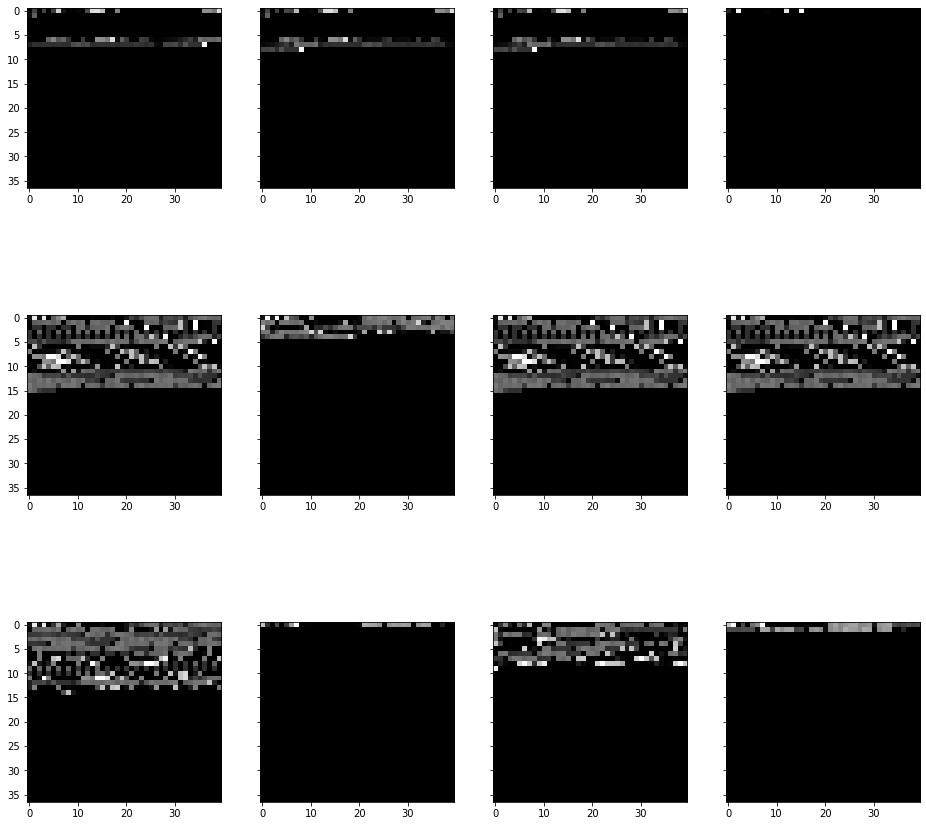



=====================D-LinkSwitch\Setup-A-1-STA.pcap=====================



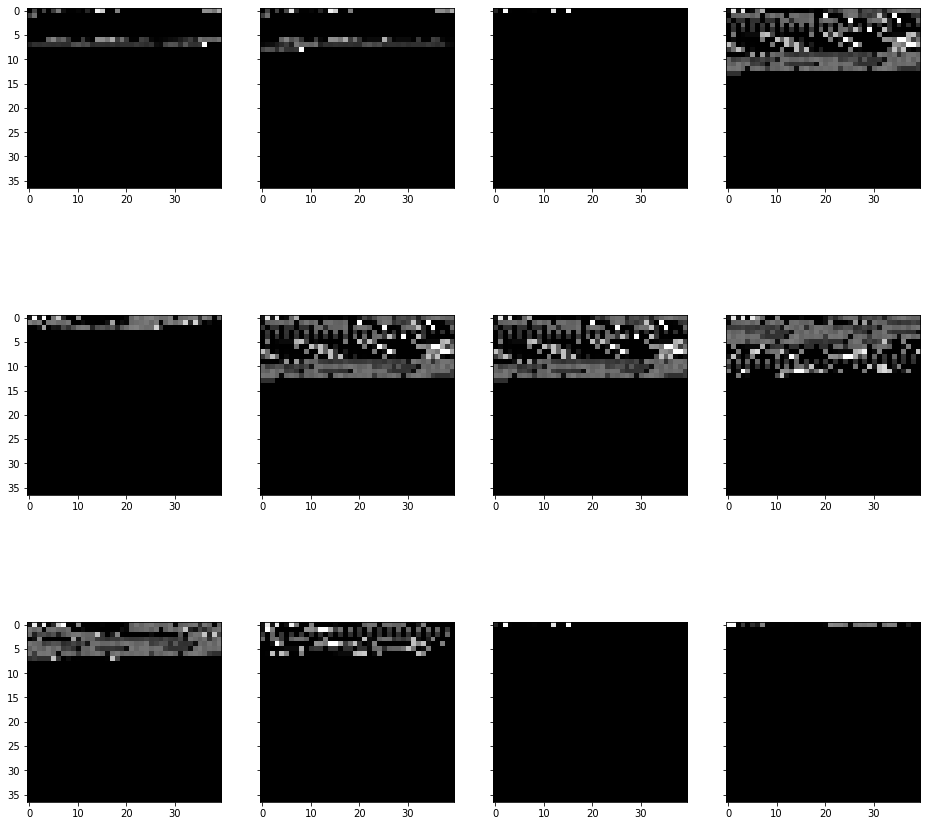



=====================D-LinkWaterSensor\Setup-A-1-STA.pcap=====================



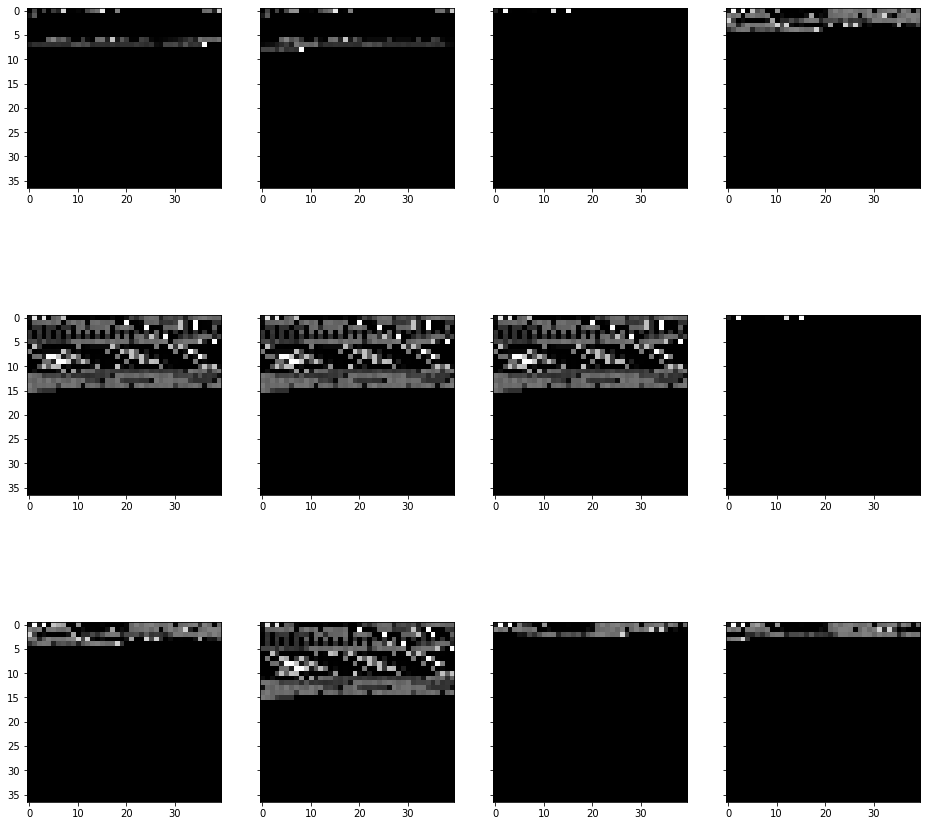



=====================EdimaxCam\Setup-A-1-STA.pcap=====================



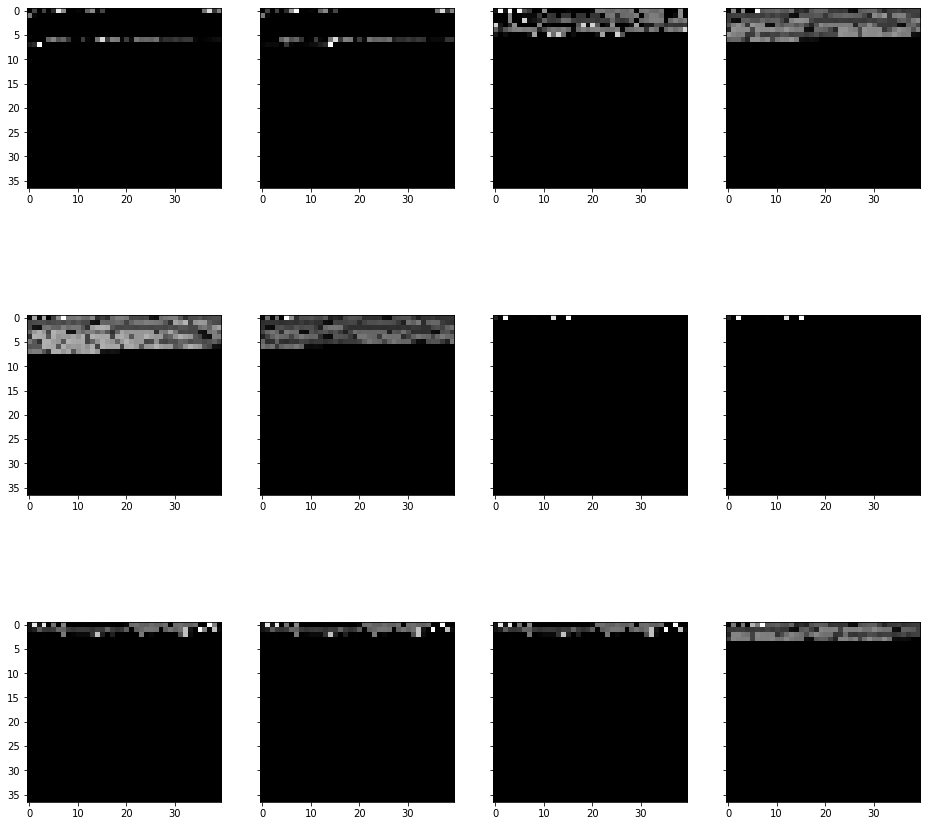



=====================EdimaxPlug1101W\Setup-A-1-STA.pcap=====================



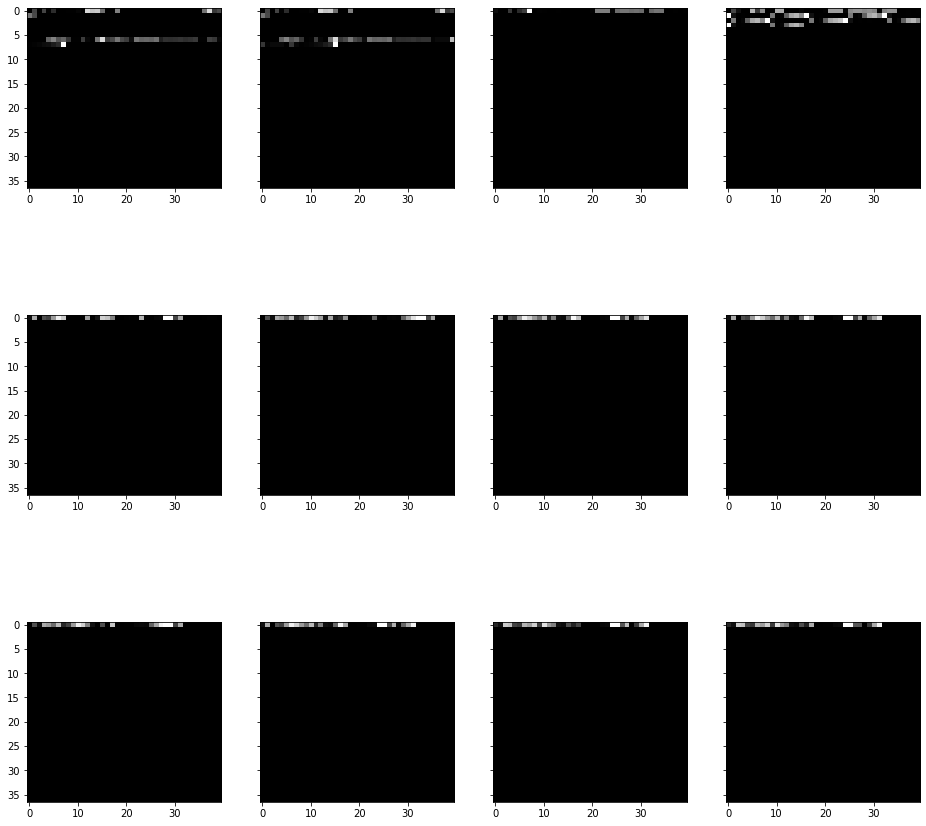



=====================EdimaxPlug2101W\Setup-A-1-STA.pcap=====================



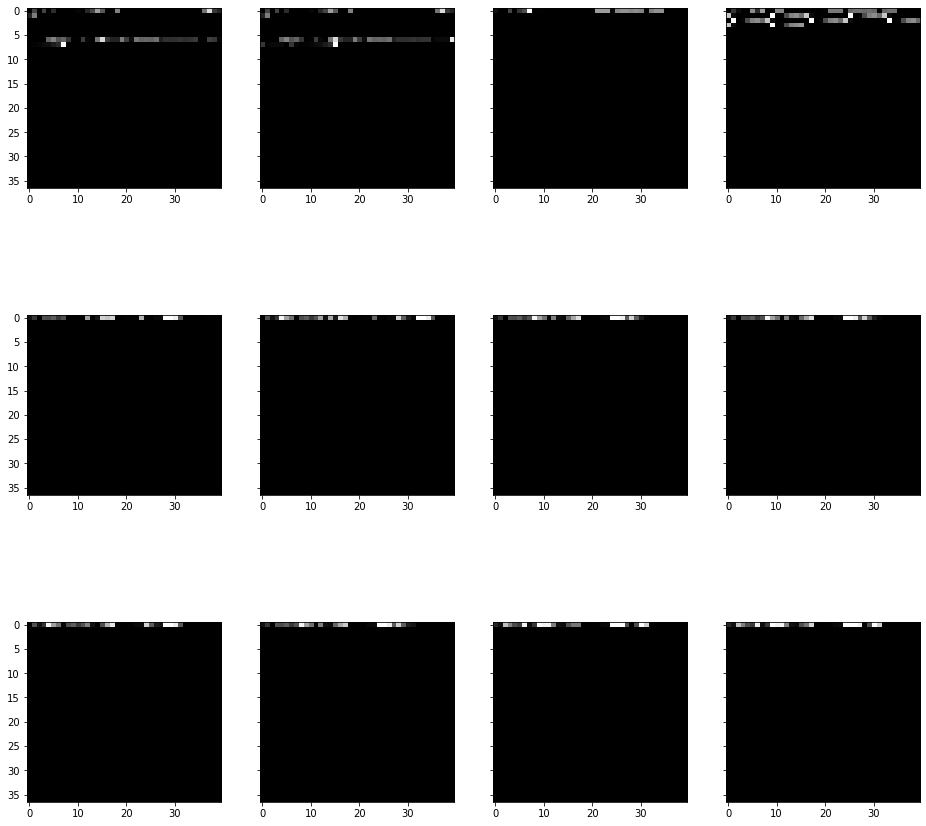



=====================EdnetCam\Setup-A-1-STA.pcap=====================



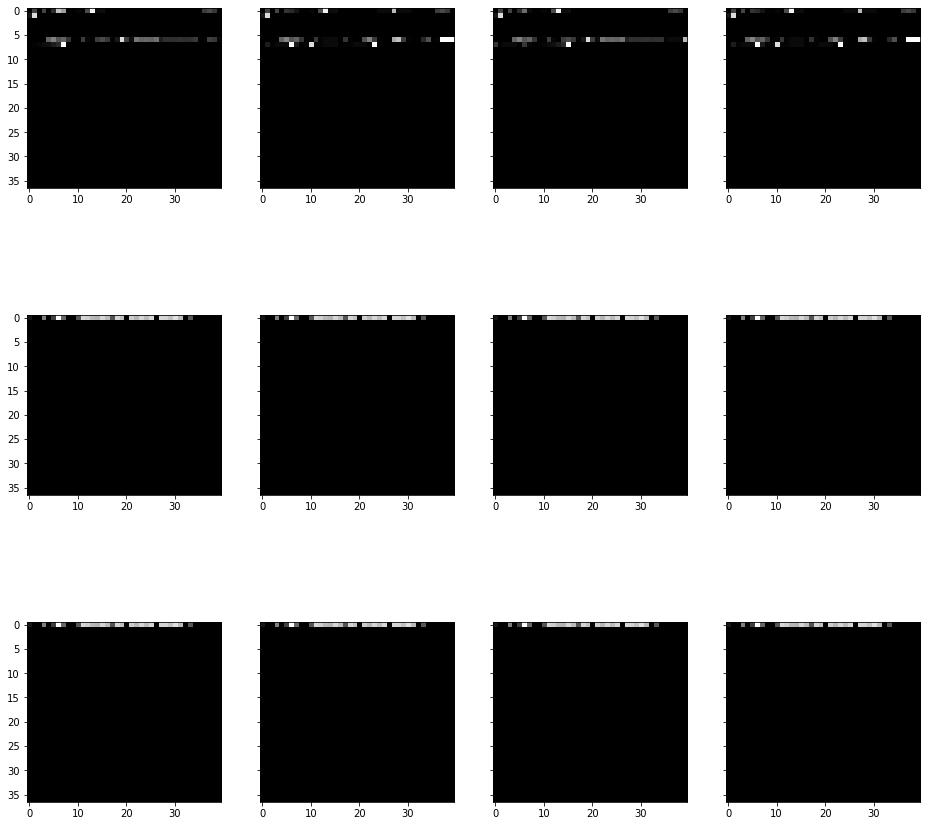



=====================EdnetGateway\Setup-A-1-STA.pcap=====================



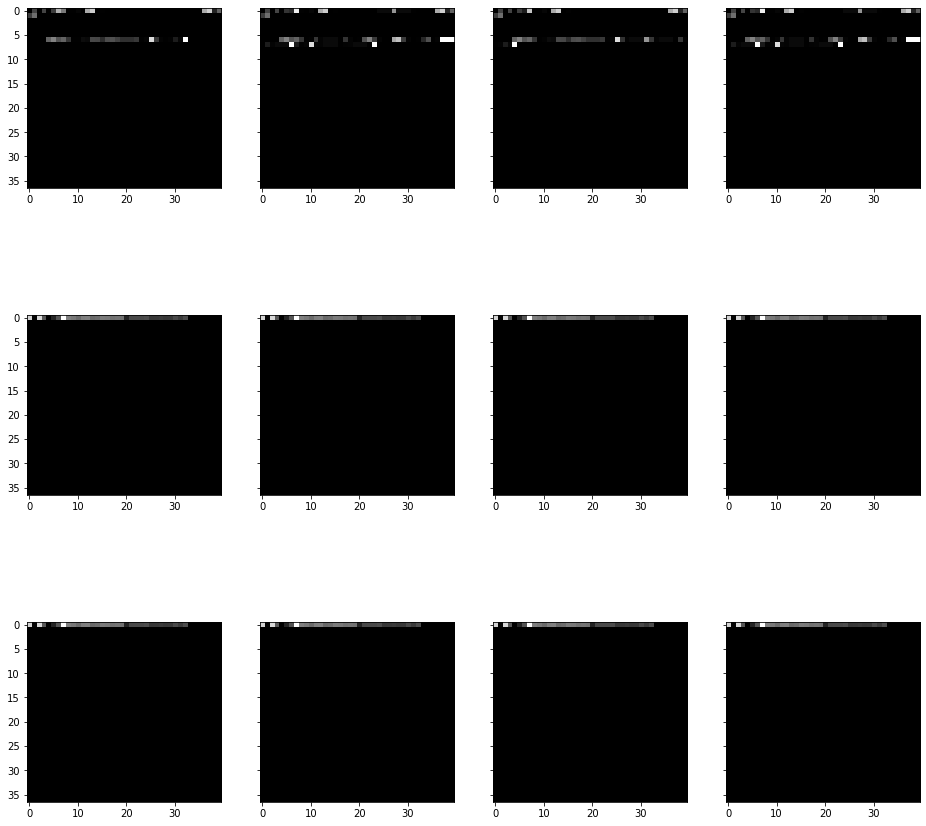



=====================HomeMaticPlug\Setup-C-1-STA.pcap=====================



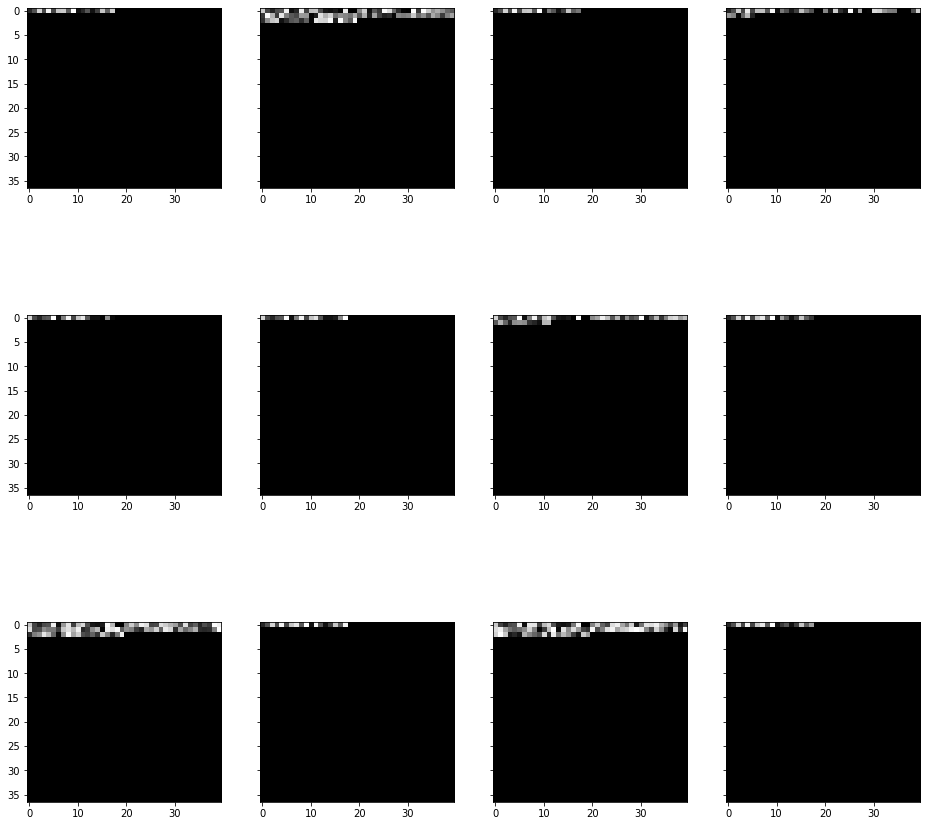



=====================HueBridge\Setup-A-1-STA.pcap=====================



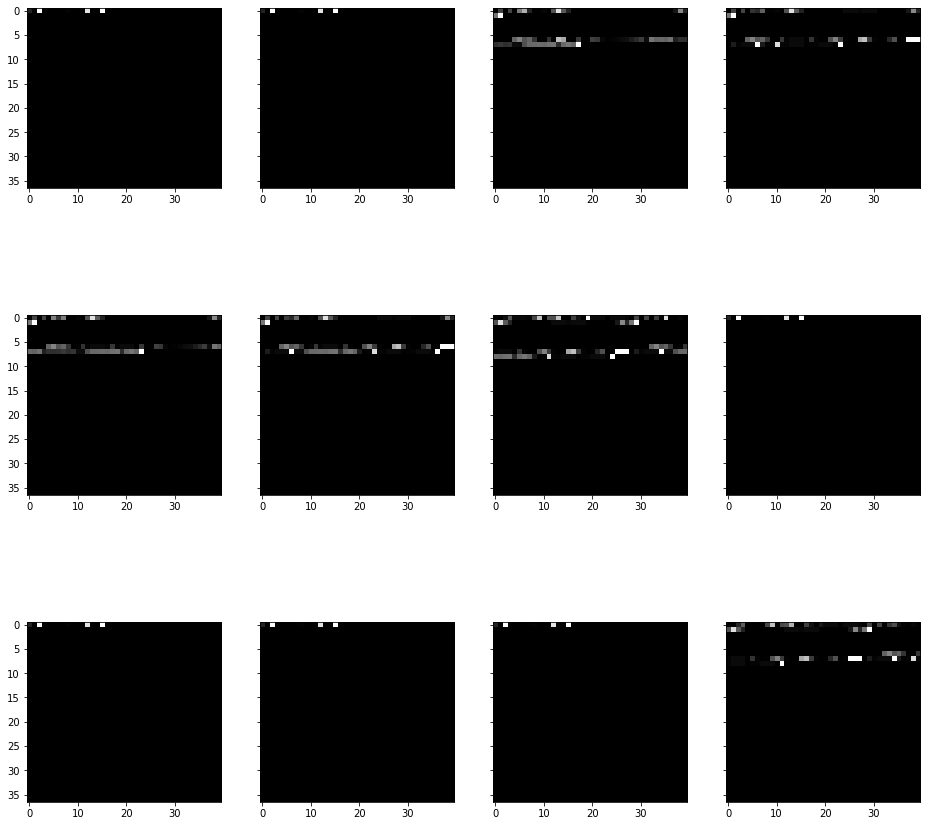



=====================HueSwitch\Setup-A-1-STA.pcap=====================



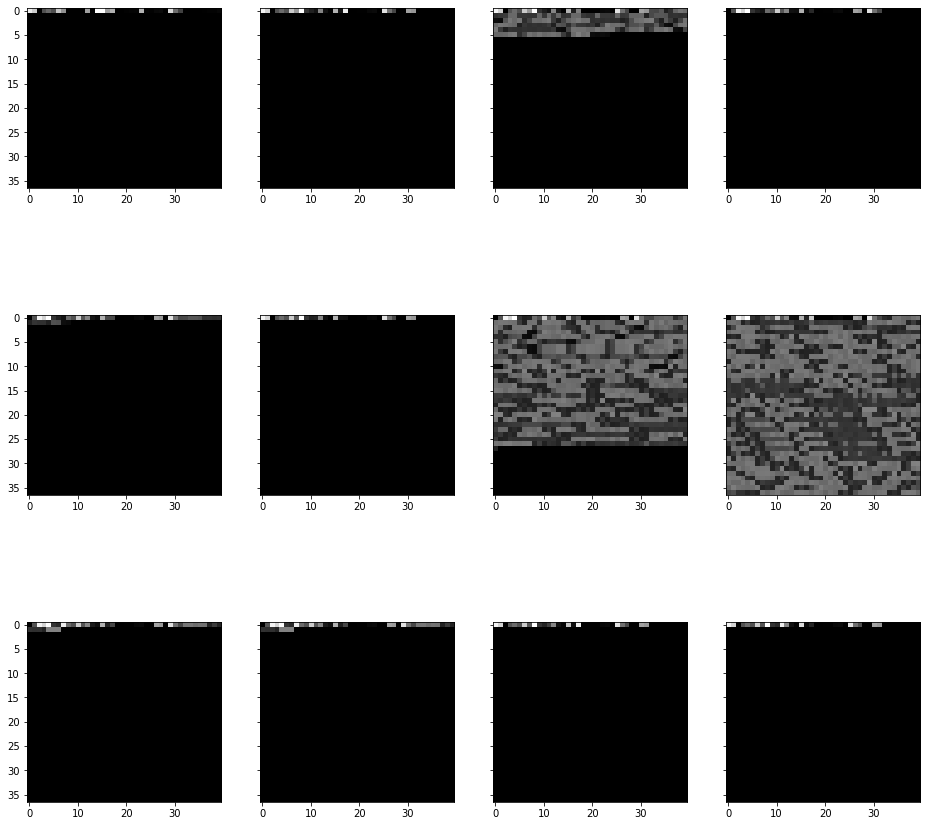



=====================iKettle2\Setup-A-1-STA.pcap=====================



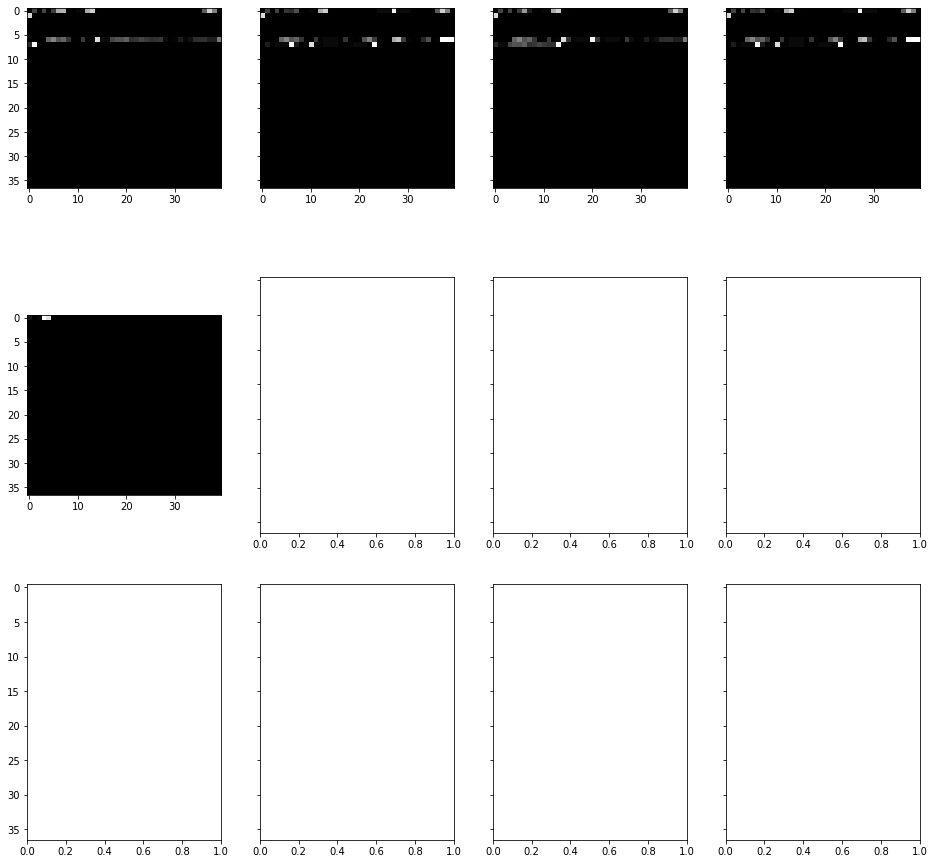



=====================Lightify\Setup-C-1-STA.pcap=====================



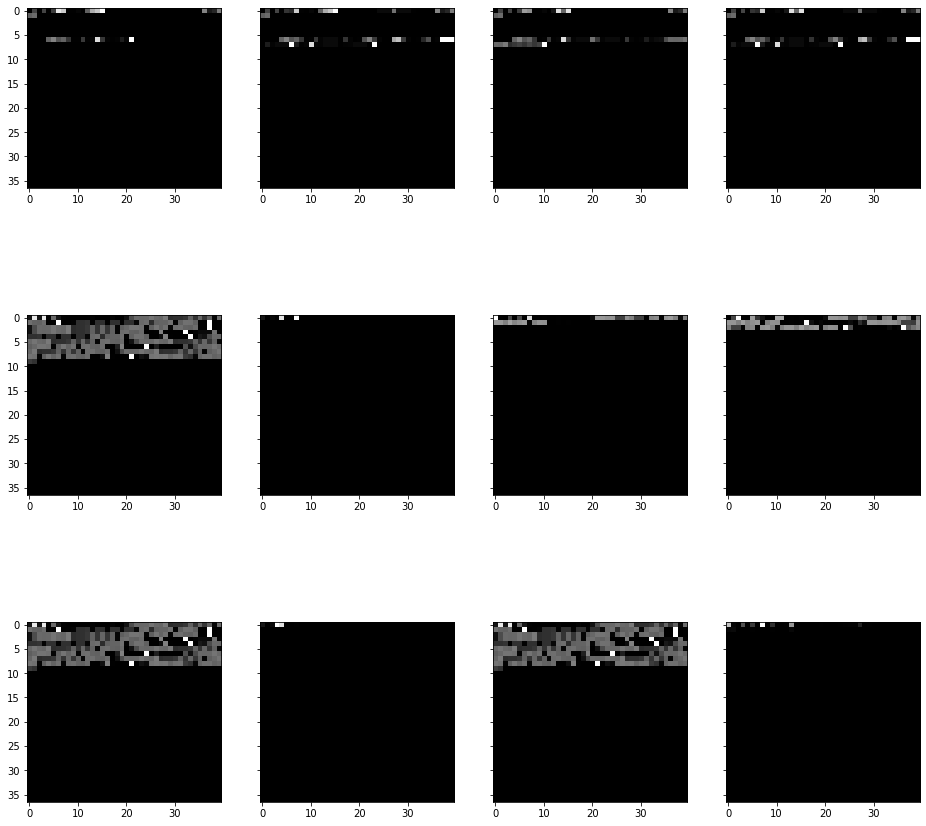



=====================MAXGateway\Setup-A-1-STA.pcap=====================



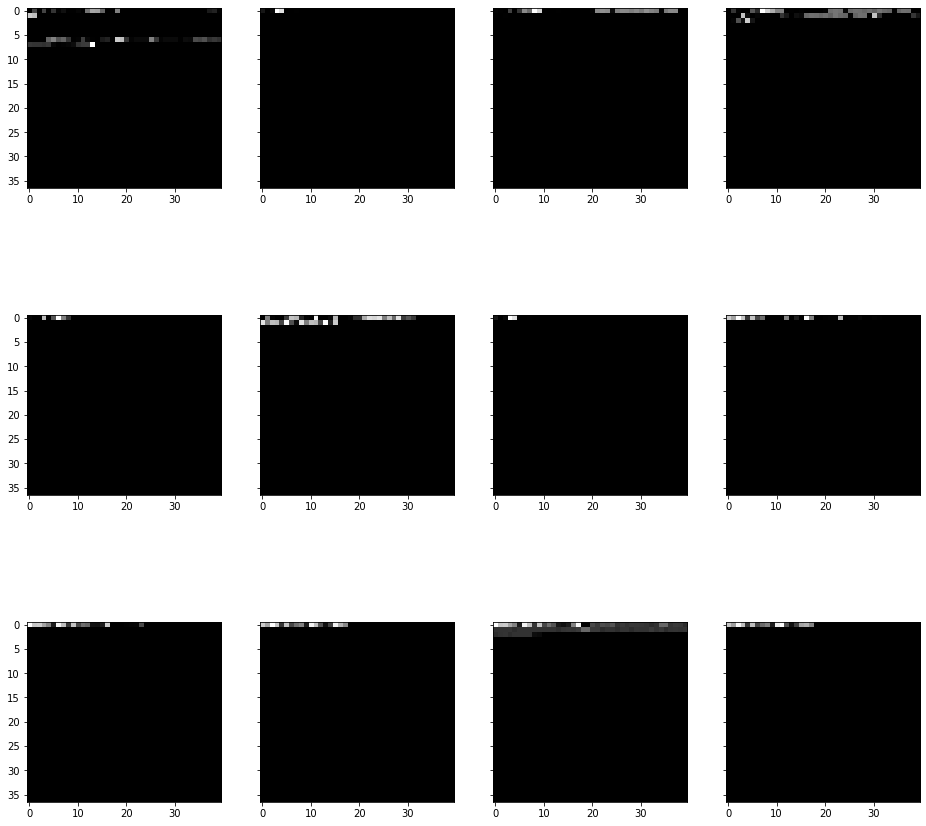



=====================New folder\Setup-A-1-STA.pcap=====================



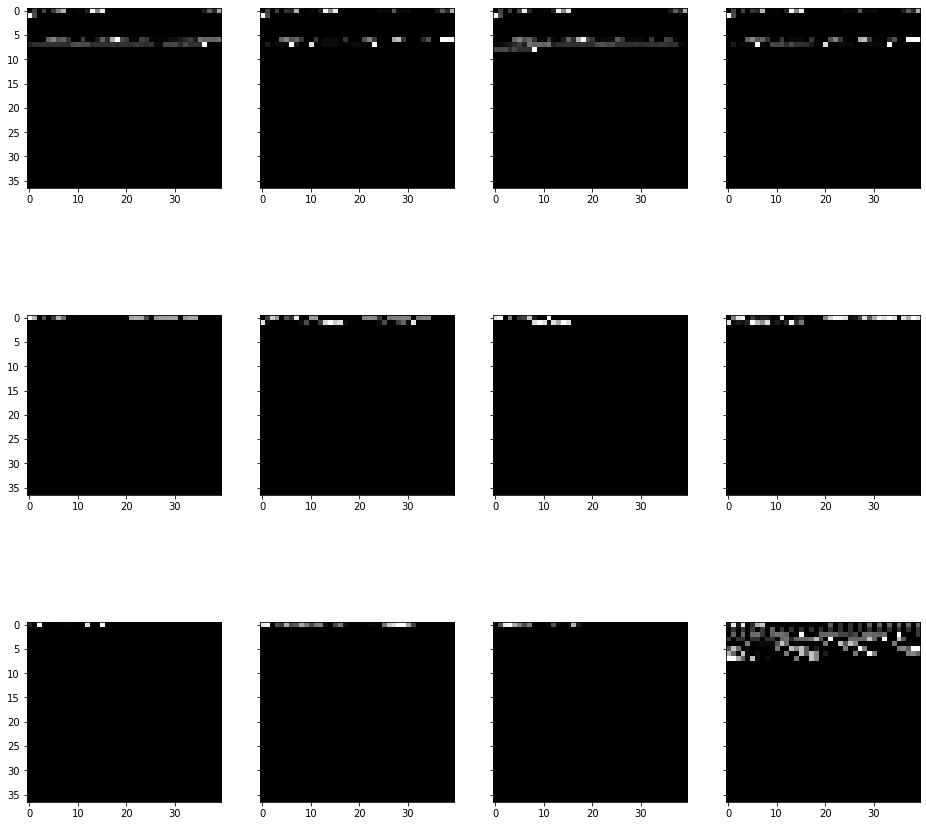



=====================New folder\Setup-C-1-STA.pcap=====================



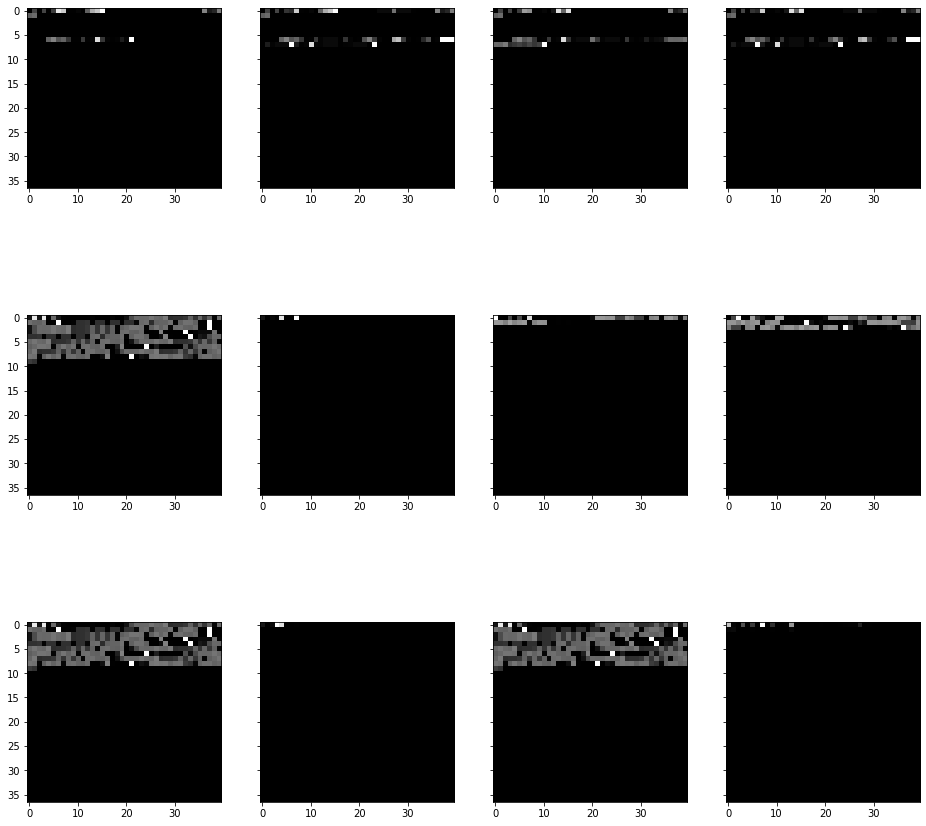



=====================SmarterCoffee\Setup-A-1-STA.pcap=====================



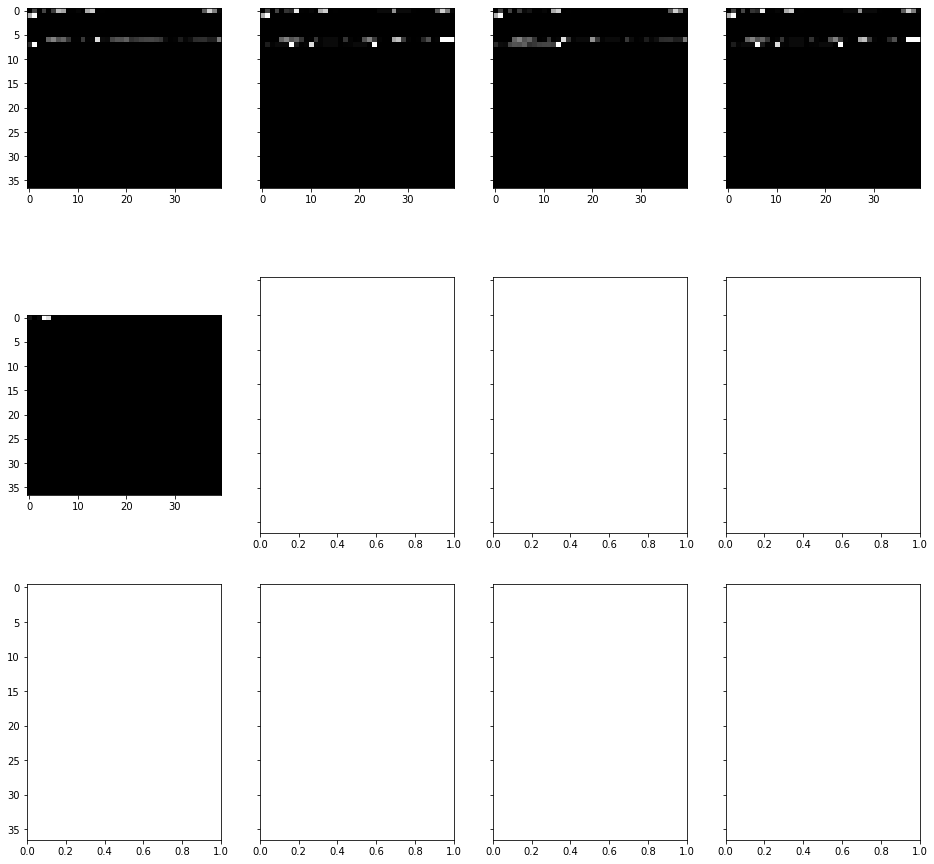



=====================TP-LinkPlugHS100\Setup-A-1-STA.pcap=====================



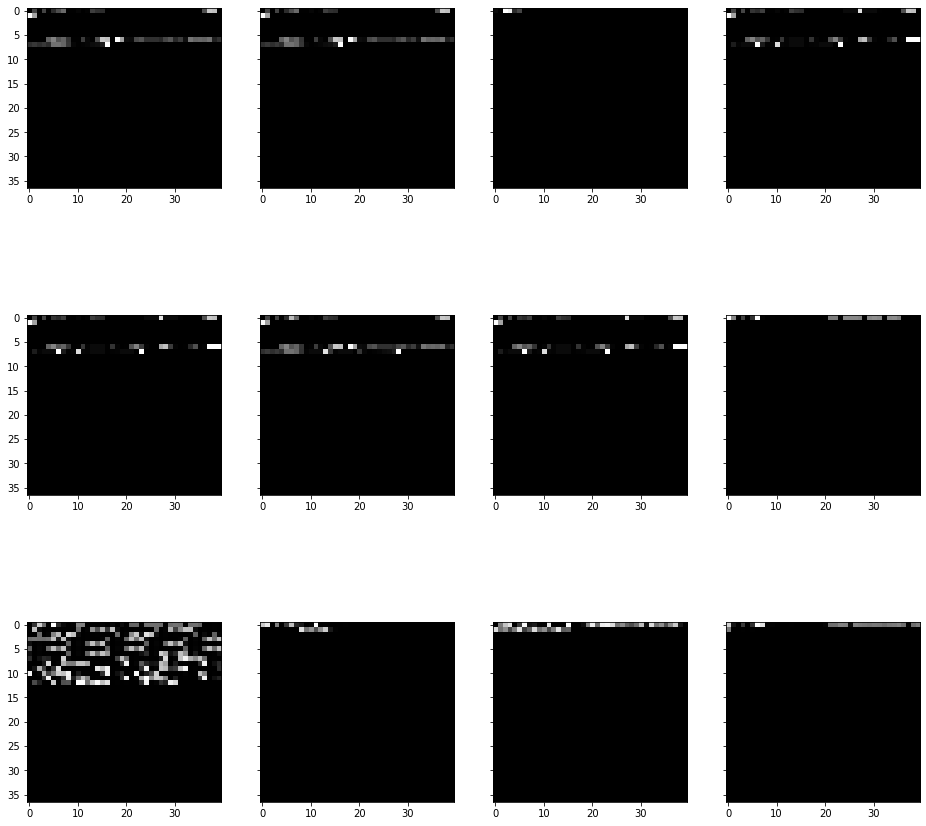



=====================TP-LinkPlugHS110\Setup-A-1-STA.pcap=====================



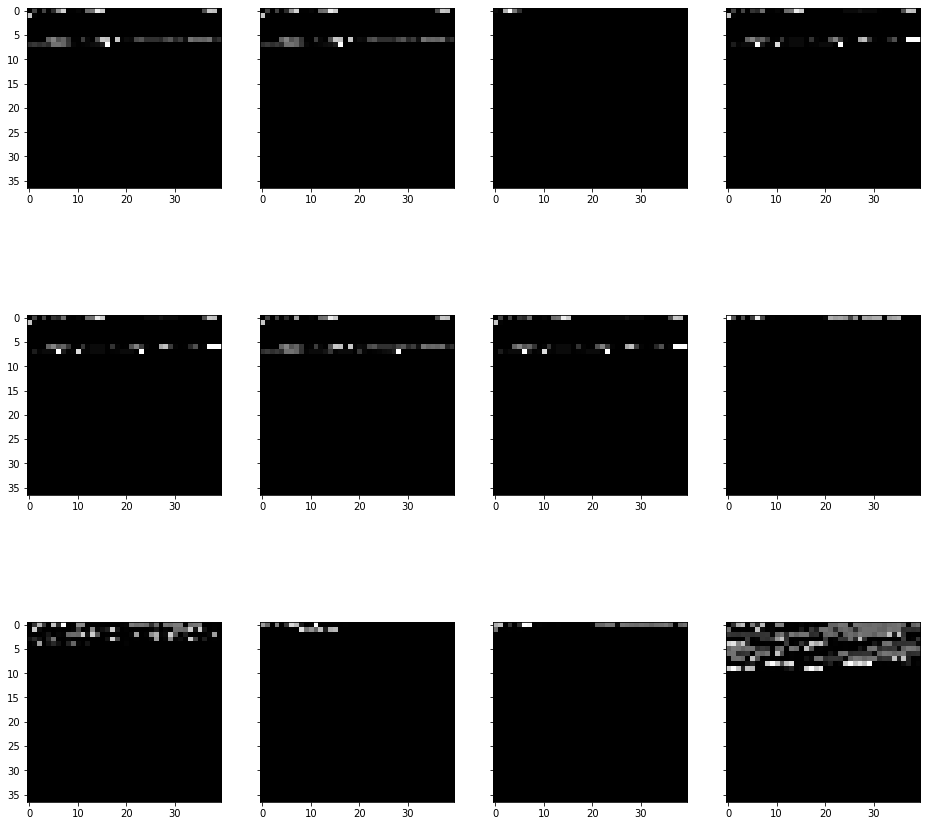



=====================WeMoInsightSwitch\Setup-A-1-STA.pcap=====================



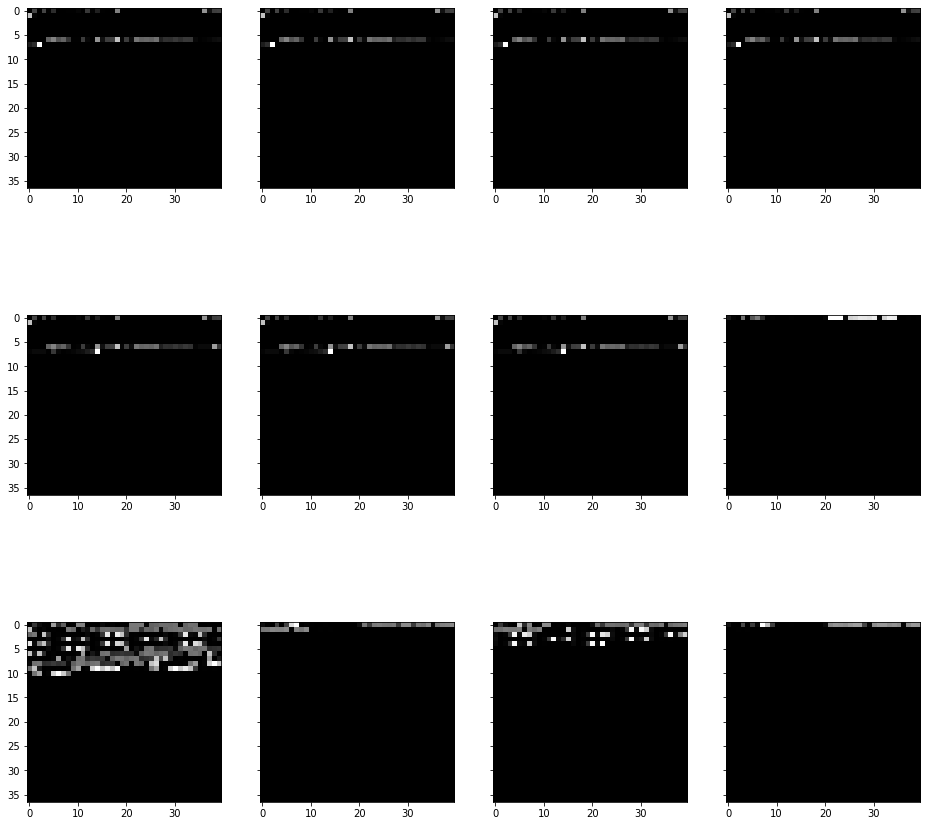



=====================WeMoLink\Setup-A-1-STA.pcap=====================



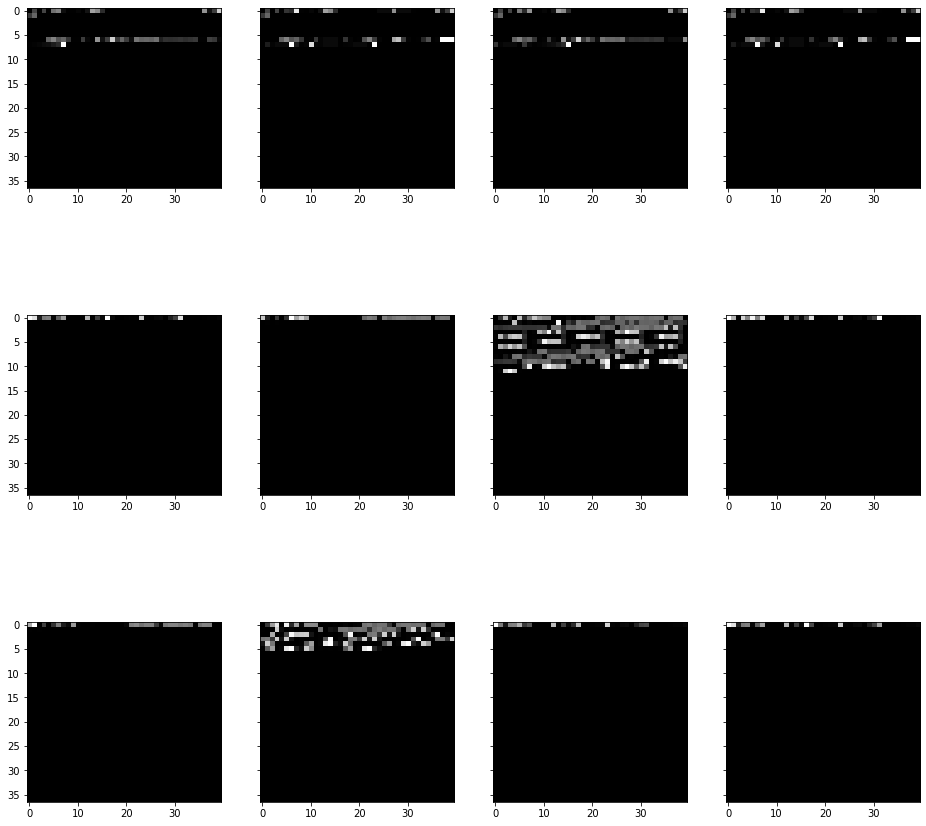



=====================WeMoSwitch\Setup-A-1-STA.pcap=====================



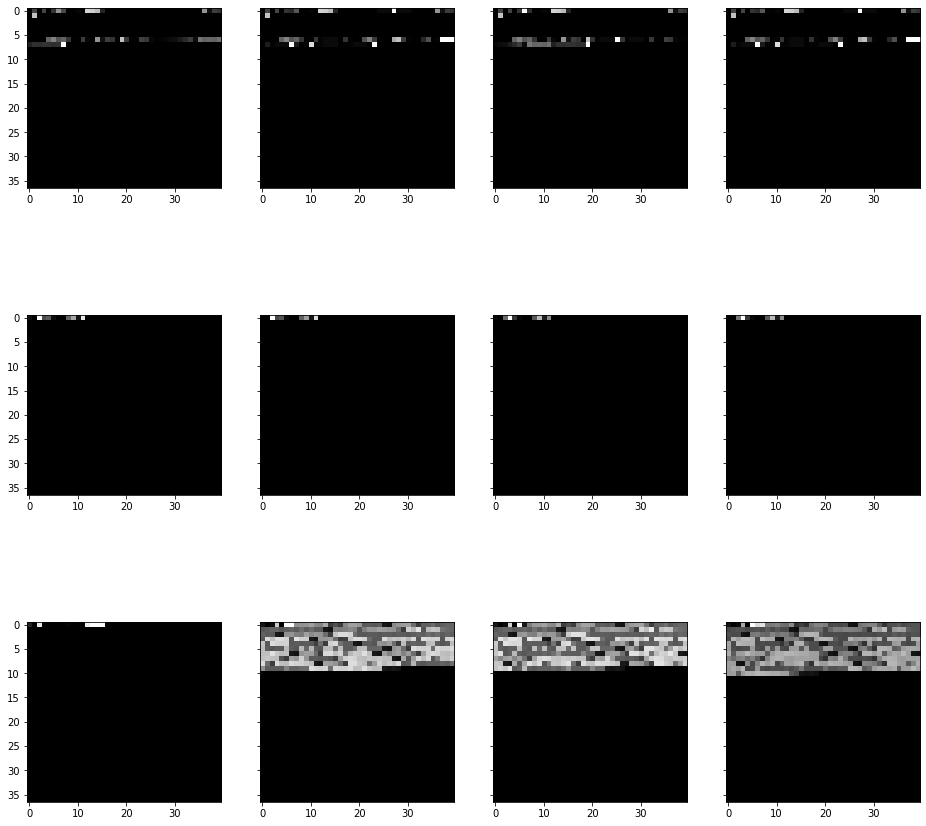



=====================Withings\Setup-A-1-STA.pcap=====================



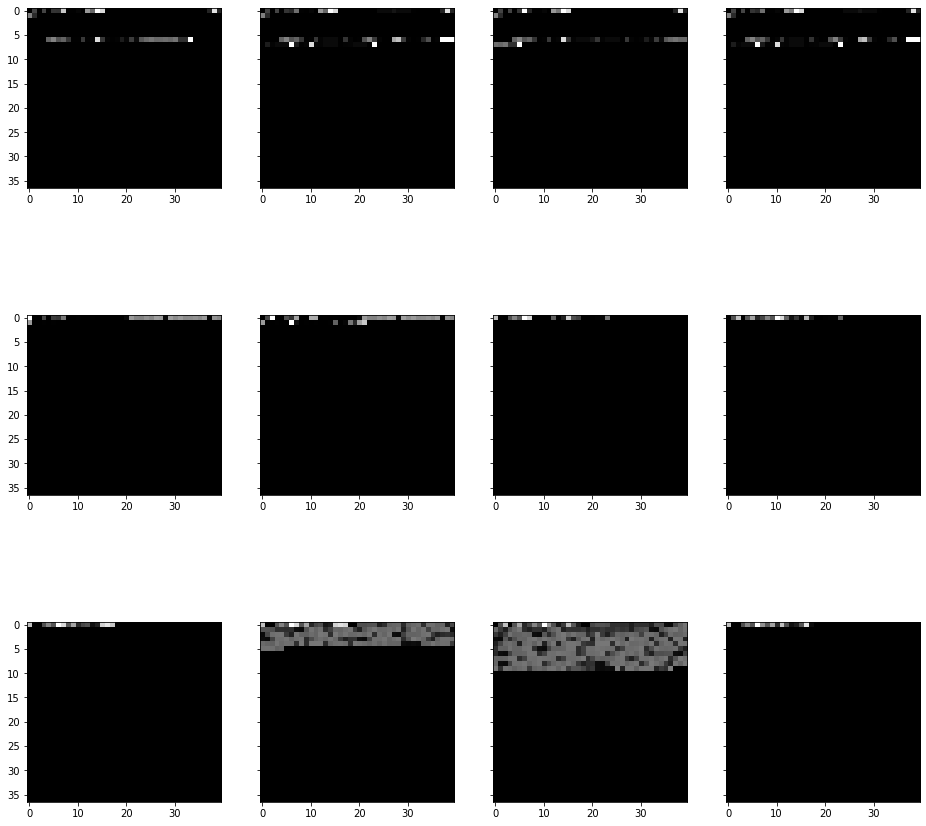

In [11]:
for i in files_add:
    payload_list=[]
    pkt = rdpcap(i)
    print("\n\n"+"====================="+ i[7:]+"====================="+"\n" )
    for j in pkt:
        listem=[]
        flag=0
        if j.haslayer(IP):
            payload=j[IP].payload.original
            flag=1
        elif j.haslayer(IPv6):
            payload=j[IPv6].payload.original
        if flag:
            if payload!=[]:
                temp=[]
                
                
                for ii in payload:
                    temp.append(ii/255)
                payload_list.append(temp)
    temp=[]
    
    for ii in payload_list:
        if len(ii)<1480:
            temp.append(pad(ii,1480)) 
        else:
            temp.append(ii)
        
    count=0         
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 16), sharey=True)
    try:
        for c in range(3):
            for b in range(4): 
                A = np.array(temp[count])
                A = A.reshape(37,40)

                axes[c, b].imshow(A, cmap="gray")
                count+=1 
        
    except: 
        pass
    plt.show()
    

    